# Домашнее задание:
1) взять данные отсюда: https://github.com/Laggg/data--for--students (flight_delays.csv)

Задача: научиться предсказывать задержку (столбик *dep_delayed_15min*) рейса по имеющимся данным с помощью Дерева решений (или других алгоритмов).
Это задача бинарной классификации (будет/не будет задержка). Улучшить приведенный пример.

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')


import itertools
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

def plot_confusion_matrix(targets,predictions,classes,
                          normalize=False,title='Confusion matrix',
                          figsize=(4, 4), cmap=plt.cm.Reds):

    conf_matrix = confusion_matrix(y_true=targets, y_pred=predictions)

    if normalize:
        conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
        title = 'Normalized ' + title.lower()

    plt.figure(figsize=figsize)
    plt.imshow(conf_matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    # plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = conf_matrix.max() / 2.
    for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):

        if normalize:
            value = '{} %'.format(format(conf_matrix[i, j] * 100, '.2f'))
        else:
            value = format(conf_matrix[i, j], fmt)

        plt.text(j,i,value,horizontalalignment="center",color="white" if conf_matrix[i, j] > thresh else "black")

        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()

In [3]:
path_to_file = 'flight_delays.csv'
data = pd.read_csv('flight_delays.csv')
data.head(10)

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
5,c-8,c-3,c-4,1918,NW,MEM,MCO,683,N
6,c-1,c-27,c-4,754,DL,PBI,LGA,1035,N
7,c-4,c-29,c-6,635,OH,MSP,CVG,596,N
8,c-7,c-28,c-5,735,AA,ONT,DFW,1189,N
9,c-6,c-20,c-2,2029,OO,DEN,PSC,853,N


In [4]:
# Отделим столбик-таргет от признаков:
target = (data['dep_delayed_15min'] == 'Y').astype(int)

data = data.drop(['dep_delayed_15min'], axis=1)
data.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732
1,c-4,c-20,c-3,1548,US,PIT,MCO,834
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423


In [5]:
# возьмем несколько столбцов данных как признаки, по которым будем предсказывать:
X = data[['DepTime','Distance', 'Month']]
X['DepTime'] = X['DepTime']//100
X['Month'] = X['Month'].apply(lambda x: int(x[2:]))
X.head()

,DepTime,Distance,Month
0,19,732,8
1,15,834,4
2,14,416,9
3,10,872,11
4,18,423,10


In [6]:
# разделим выборку на обучающую и тестовую(валидационную, проверочную, отложенная)
x_train, x_test, y_train, y_test = train_test_split(X, target, test_size=0.1, random_state=42)

# обучим модель дерева на обучающей выборке и предскажем на отложенной:
model = DecisionTreeClassifier(max_depth=40, min_samples_split=2)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

Общее число совпадений 0.7458
Полнота охвата класса 1: 0.227012987012987
Точность: 0.2930918846411804


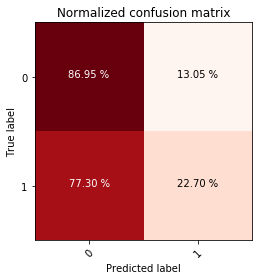

In [7]:
# матрица ошибок алгоритма. При хорошем прогнозе на главной диагонали будут стоять цифры, близкие к 100.
print('Общее число совпадений', accuracy_score(y_test, y_pred))
print('Полнота охвата класса 1:', recall_score(y_test, y_pred))
print('Точность:', precision_score(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, [0,1], normalize=True)

подсказка - для работы с категориальными признаками прочитайте про Label Encoder и OneHot Encoder

дедлайн - через неделю, 19.05.2020. Удачи!)

In [9]:
# возьмем несколько столбцов данных как признаки, по которым будем предсказывать:
from sklearn.preprocessing import StandardScaler
X = data[['DepTime','Distance', 'Month', 'DayOfWeek', 'Origin']]
X['DayOfWeek'] = X['DayOfWeek'].apply(lambda x: int(x[2:]))
X['Month'] = X['Month'].apply(lambda x: int(x[2:]))

_dict1 = {1:1, 2:1, 3:2, 4:2, 5:2, 6:3, 7:3, 8:3, 9:4, 10:4, 11:4, 12:1}
X['Seasons'] = X['Month'].apply(lambda x: _dict1[x])
#print(X)

_dict2 = dict()
for i,x in enumerate(X['Origin']):
    if _dict2.get(x) == None:
        _dict2[x]=i
X['Origin'] = X['Origin'].apply(lambda x: _dict2[x])

#Нормировка
#for key in X.keys():
    #X[key]=2*X[key]/max(X[key])-1
X = StandardScaler().fit(X).transform(X)
pd.DataFrame(X).head()

,0,1,2,3,4,5
0,1.243715,0.004530,0.428414,1.530490,-0.191146,0.437469
1,0.433431,0.182040,-0.743428,-0.477915,-0.190484,-0.467964
2,0.168934,-0.545405,0.721374,0.526288,-0.189823,1.342902
3,-0.685433,0.248172,1.307295,1.028389,-0.189162,1.342902
4,1.021202,-0.533223,1.014335,1.028389,-0.188501,1.342902


In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, target, test_size=0.1, random_state=42)

In [11]:
model = DecisionTreeClassifier(max_depth=40, min_samples_split=2)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

Общее число совпадений 0.7273
Полнота охвата класса 1: 0.32831168831168833
Точность: 0.3059051306873185


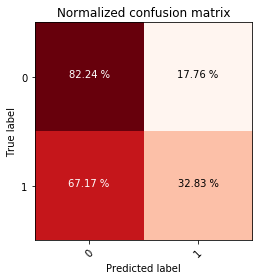

In [12]:
#с помощью того же дерева с другими данными
# матрица ошибок алгоритма. При хорошем прогнозе на главной диагонали будут стоять цифры, близкие к 100.
print('Общее число совпадений', accuracy_score(y_test, y_pred))
print('Полнота охвата класса 1:', recall_score(y_test, y_pred))
print('Точность:', precision_score(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, [0,1], normalize=True)
#Результат улучшился

In [13]:
#Напишем сетку на pytorch))0
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

In [14]:
class trainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = trainData(torch.FloatTensor(np.array(x_train)), torch.FloatTensor(np.array(y_train)))

In [15]:
class testData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = testData(torch.FloatTensor(np.array(x_test)))

In [63]:
train_loader = DataLoader(dataset=train_data, batch_size=10, shuffle=True)

In [71]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer_1 = nn.Linear(6, 90) 
        self.layer_2 = nn.Linear(90, 90)
        #self.layer_3 = nn.Linear(200, 40)
        #self.layer_4 = nn.Linear(20, 20)
        self.layer_out = nn.Linear(90, 2) 
        self.relu = nn.ReLU()
        self.Softmax = nn.Softmax()
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.relu(self.layer_1(x))
        x = self.relu(self.layer_2(x))
        #x = self.relu(self.layer_3(x))
        #x = self.relu(self.layer_4(x))
        x = self.Softmax(self.layer_out(x))
        return x

In [72]:
net = Net()
inputs, output = next(iter(train_loader))
outputs = net(inputs)
print(outputs.view(1, -1))
print(torch.max(outputs.view(1, -1), 1))

tensor([[0.5346, 0.4654, 0.5296, 0.4704, 0.5366, 0.4634, 0.5256, 0.4744, 0.5321,
         0.4679, 0.5350, 0.4650, 0.5253, 0.4747, 0.5240, 0.4760, 0.5393, 0.4607,
         0.5165, 0.4835]], grad_fn=<ViewBackward>)
torch.return_types.max(
values=tensor([0.5393], grad_fn=<MaxBackward0>),
indices=tensor([16]))


In [73]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(net.parameters(), lr=0.001)

In [74]:
for epoch in range(4):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
    #for i in range(50000):
        # get the inputs; data is a list of [inputs, labels]
        inputs, output = data
        #a = torch.tensor([np.random.randn(2)])
        #inputs, output = (a, torch.tensor([float(a[:,0]*a[:,1]>=0)]))
        #print (inputs)
        #print (output)
        #break
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs.type(torch.FloatTensor))
        #print(outputs)

        # print(outputs, inputs, output)
        loss = criterion(outputs, output.type(torch.LongTensor))
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.6f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 0.507723
[1,  4000] loss: 0.495552
[1,  6000] loss: 0.498325
[1,  8000] loss: 0.495870
[2,  2000] loss: 0.496913
[2,  4000] loss: 0.500889
[2,  6000] loss: 0.495927
[2,  8000] loss: 0.495838
[3,  2000] loss: 0.498018
[3,  4000] loss: 0.499680
[3,  6000] loss: 0.499414
[3,  8000] loss: 0.496284
[4,  2000] loss: 0.497331
[4,  4000] loss: 0.496280
[4,  6000] loss: 0.497694
[4,  8000] loss: 0.498294
Finished Training


In [75]:
test_loader = DataLoader(dataset=test_data, batch_size=1)

In [76]:
y_preds = []

net.eval()
with torch.no_grad():
    for data_batch in test_loader:
        outputs = net(data_batch)
        #print(outputs)
        _, predicted = torch.max(outputs.view(1, -1), 1)
        y_preds.append(predicted)
#y_preds = [a.squeeze().tolist() for a in y_preds]

Общее число совпадений 0.8077
Полнота охвата класса 1: 0.09558441558441559
Точность: 0.5027322404371585


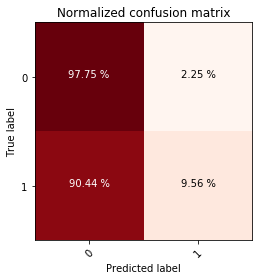

In [77]:
# матрица ошибок алгоритма. При хорошем прогнозе на главной диагонали будут стоять цифры, близкие к 100.
print('Общее число совпадений', accuracy_score(y_test, y_preds))
print('Полнота охвата класса 1:', recall_score(y_test, y_preds))
print('Точность:', precision_score(y_test, y_preds))
plot_confusion_matrix(y_test, y_preds, [0,1], normalize=True)